In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cPickle as pickle
import codecs

from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster.bicluster import SpectralCoclustering
from biclustering.biclustering import DeltaBiclustering
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [3]:
arena_news_stem_df = pd.read_pickle('arena_news_stem_df.pkl')
sport_news_stem_df = pd.read_pickle('sport_news_stem_df.pkl')
jovem_news_stem_df = pd.read_pickle('jovem_news_stem_df.pkl')
arena_news_df = pd.read_pickle('arena_news_df.pkl')
sport_news_df = pd.read_pickle('sport_news_df.pkl')
jovem_news_df = pd.read_pickle('jovem_news_df.pkl')

In [4]:
labels = np.array(len(arena_news_df)*[1] + len(sport_news_df)*[0])

In [5]:
def sparseness(C):
    return 1 - len(C.nonzero()[0]) / float(C.shape[0] * C.shape[1])

In [6]:
count_vect_bin = CountVectorizer(encoding='UTF-8',lowercase=False,min_df=2,binary=True)
X_bin = count_vect_bin.fit_transform(arena_news_df['all'].tolist() + sport_news_df['all'].tolist())
# print ', '.join(count_vect.get_feature_names())
# pd.DataFrame(X_bin.A, columns=count_vect_bin.get_feature_names())
print "toy_arena_sport_news_binary sparseness: %.5f" % sparseness(X_bin)
with open('toy_arena_sport_news_binary.pickle', 'wb') as handle:
    pickle.dump(X_bin, handle)

toy_arena_sport_news_binary sparseness: 0.97191


In [7]:
count_vect = CountVectorizer(encoding='UTF-8',lowercase=False,min_df=2)
X = count_vect.fit_transform(arena_news_df['all'].tolist() + sport_news_df['all'].tolist())
# print ', '.join(count_vect.get_feature_names())
# pd.DataFrame(X.A, columns=count_vect.get_feature_names())
print "toy_arena_sport_news sparseness: %.5f" % sparseness(X)
with open('toy_arena_sport_news.pickle', 'wb') as handle:
    pickle.dump(X, handle)

toy_arena_sport_news sparseness: 0.97191


In [8]:
count_vect_stem_bin = CountVectorizer(encoding='UTF-8',lowercase=False,min_df=2,binary=True)
X_stem_bin = count_vect_stem_bin.fit_transform(arena_news_stem_df['all'].tolist() + sport_news_stem_df['all'].tolist())
# print ', '.join(count_vect.get_feature_names())
# pd.DataFrame(X_stem_bin.A, columns=count_vect_stem_bin.get_feature_names())
print "toy_arena_sport_news_stem_binary sparseness: %.5f" % sparseness(X_stem_bin)
with open('toy_arena_sport_news_stem_binary.pickle', 'wb') as handle:
    pickle.dump(X_stem_bin, handle)

toy_arena_sport_news_stem_binary sparseness: 0.95972


In [9]:
count_vect_stem = CountVectorizer(encoding='UTF-8',lowercase=False,min_df=2)
X_stem = count_vect_stem.fit_transform(arena_news_stem_df['all'].tolist() + sport_news_stem_df['all'].tolist())
# print ', '.join(count_vect.get_feature_names())
# pd.DataFrame(X_stem.A, columns=count_vect_stem.get_feature_names())
print "toy_arena_sport_news_stem sparseness: %.5f" % sparseness(X_stem)
with open('toy_arena_sport_news_stem.pickle', 'wb') as handle:
    pickle.dump(X_stem, handle)

toy_arena_sport_news_stem sparseness: 0.95972


In [12]:
# simple
X_train = TfidfTransformer(norm=None, use_idf=False).fit_transform(X)
print "toy_arena_sport_news_tf sparseness: %.5f" % sparseness(X_train)
with open('toy_arena_sport_news_tf.pickle', 'wb') as handle:
    pickle.dump(X_train, handle)

X_train_stem = TfidfTransformer(norm=None, use_idf=False).fit_transform(X_stem)
print "toy_arena_sport_news_tf_stem sparseness: %.5f" % sparseness(X_train_stem)
with open('toy_arena_sport_news_tf_stem.pickle', 'wb') as handle:
    pickle.dump(X_train_stem, handle)

# simple norm
X_train_norm = TfidfTransformer(norm=u'l2', use_idf=False).fit_transform(X)
print "toy_arena_sport_news_tf_norm sparseness: %.5f" % sparseness(X_train_norm)
with open('toy_arena_sport_news_tf_norm.pickle', 'wb') as handle:
    pickle.dump(X_train_norm, handle)
np.savetxt('toy_arena_sport_news_tf_norm.csv', X_train_norm.toarray(), delimiter=",") 

X_train_norm_stem = TfidfTransformer(norm=u'l2', use_idf=False).fit_transform(X_stem)
print "toy_arena_sport_news_tf_norm_stem sparseness: %.5f" % sparseness(X_train_norm_stem)
with open('toy_arena_sport_news_tf_norm_stem.pickle', 'wb') as handle:
    pickle.dump(X_train_norm_stem, handle)

# tfidf
X_train_tfidf = TfidfTransformer(norm=None, use_idf=True).fit_transform(X)
print "toy_arena_sport_news_tf_idf sparseness: %.5f" % sparseness(X_train_tfidf)
with open('toy_arena_sport_news_tf_idf.pickle', 'wb') as handle:
    pickle.dump(X_train_tfidf, handle)

X_train_tfidf_stem = TfidfTransformer(norm=None, use_idf=True).fit_transform(X_stem)
print "toy_arena_sport_news_tf_idf_stem sparseness: %.5f" % sparseness(X_train_tfidf_stem)
with open('toy_arena_sport_news_tf_idf_stem.pickle', 'wb') as handle:
    pickle.dump(X_train_tfidf_stem, handle)

# norm tfidf
X_train_norm_tfidf = TfidfTransformer(norm=u'l2', use_idf=True).fit_transform(X)
print "toy_arena_sport_news_tf_idf_norm sparseness: %.5f" % sparseness(X_train_norm_tfidf)
with open('toy_arena_sport_news_tf_idf_norm.pickle', 'wb') as handle:
    pickle.dump(X_train_norm_tfidf, handle)

X_train_norm_tfidf_stem = TfidfTransformer(norm=u'l2', use_idf=True).fit_transform(X_stem)
print "toy_arena_sport_news_tf_idf_norm_stem sparseness: %.5f" % sparseness(X_train_norm_tfidf_stem)
with open('toy_arena_sport_news_tf_idf_norm_stem.pickle', 'wb') as handle:
    pickle.dump(X_train_norm_tfidf_stem, handle)

toy_arena_sport_news_tf sparseness: 0.97191
toy_arena_sport_news_tf_stem sparseness: 0.95972
toy_arena_sport_news_tf_norm sparseness: 0.97191
toy_arena_sport_news_tf_norm_stem sparseness: 0.95972
toy_arena_sport_news_tf_idf sparseness: 0.97191
toy_arena_sport_news_tf_idf_stem sparseness: 0.95972
toy_arena_sport_news_tf_idf_norm sparseness: 0.97191
toy_arena_sport_news_tf_idf_norm_stem sparseness: 0.95972


In [31]:
def onmtf(X, U, S, V):
    U = U * (X.dot(V).dot(S.T)) / (U.dot(S).dot(V.T).dot(X.T).dot(U))
    S = S * (U.T.dot(X).dot(V)) / (U.T.dot(U).dot(S).dot(V.T).dot(V))
    V = V * (X.T.dot(U).dot(S)) / (V.dot(S.T).dot(U.T).dot(X).dot(V))
    return U, S, V

def onm3f(X, U, S, V):
     U = U * (X.dot(V).dot(S.T)) / np.sqrt(U.dot(U.T).dot(X).dot(V).dot(S.T))
     V = V * (X.T.dot(U).dot(S)) / np.sqrt(V.dot(V.T).dot(X.T).dot(U).dot(S))
     S = S * (U.T.dot(X).dot(V)) / np.sqrt(U.T.dot(U).dot(S).dot(V.T).dot(V))
     return U, S, V

def nbvd(X, U, S, V):
     U = U * (X.dot(V).dot(S.T)) / U.dot(U.T).dot(X).dot(V).dot(S.T)
     V = V * (X.T.dot(U).dot(S)) / V.dot(V.T).dot(X.T).dot(U).dot(S)
     S = S * (U.T.dot(X).dot(V)) / U.T.dot(U).dot(S).dot(V.T).dot(V)
     return U, S, V
    
def matrix_factorization_clustering(X, k, l, factorization_func=onmtf, norm=False, num_iters=100):
    m, n = X.shape
    U = np.random.rand(m,k)
    S = np.random.rand(k,l)
    V = np.random.rand(n,l)

    if norm:
        X = normalize(X)

    for i in xrange(num_iters):
        U, S, V = factorization_func(X, U, S, V)
#         error = np.sum((X - U.dot(S).dot(V.T))**2)
#         print 'iteration %s' % i
#         print 'error %s' % error
#         print ''

    Du = np.diag(np.ones(m).dot(U))
    Dv = np.diag(np.ones(n).dot(V))

    U = U.dot( np.diag(S.dot(Dv).dot(np.ones(l))) )
    V = V.dot( np.diag(np.ones(k).dot(Du).dot(S)) )

    rows_ind = np.argmax(U, axis=1)
    cols_ind = np.argmax(V, axis=1)

    return U, S, V, rows_ind, cols_ind

def plot_factorization_result(U, S, V):
    fig = plt.figure()
    
    ax = fig.add_subplot(2, 2, 1)
    ax.matshow(U.dot(S).dot(V.T), cmap=plt.cm.Blues)
    ax.set_title('reconstruction')
    ax.grid()
    
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.matshow(U, cmap=plt.cm.Blues)
    ax2.set_title('U*S')
    ax2.grid()

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.matshow(S, cmap=plt.cm.Blues)
    ax3.set_title('S')
    ax3.grid()

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.matshow(V.T, cmap=plt.cm.Blues)
    ax4.set_title('S*V\'')
    ax4.grid()
    
    plt.show()


def scores(labels_true, labels_pred, row=True):
    txt = '## Scores\n\n'
    if row:
        txt += '#### Rows scores\n'
    else:
        txt += '#### Cols scores\n'
    txt += '- Rand score: %s\n' % adjusted_rand_score(labels_true, labels_pred)
    txt += '- Normalized mutual information score: %s\n\n' % normalized_mutual_info_score(labels_true, labels_pred)
    return txt

In [32]:
U, S, V, rows_ind, cols_ind = matrix_factorization_clustering(X_train_norm_tfidf.toarray(), 2, 4, onmtf, num_iters=100)

In [33]:
print adjusted_rand_score(labels, rows_ind)

0.993749984789


In [34]:
U_norm_0 = U[:,0] / np.sum(U, axis=1)
U_norm_1 = U[:,1] / np.sum(U, axis=1)
print U_norm_0.shape

(640,)


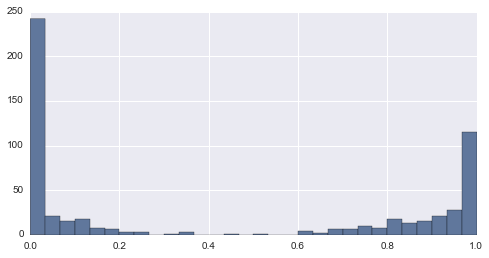

In [35]:
plt.hist(U_norm_0[(U_norm_0 > 0.0) & (U_norm_0 < 1.0)], bins=30)
plt.show()

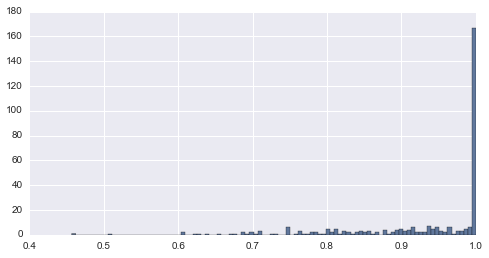

In [37]:
plt.hist(U_norm_0[0:320], bins=100)
plt.show()

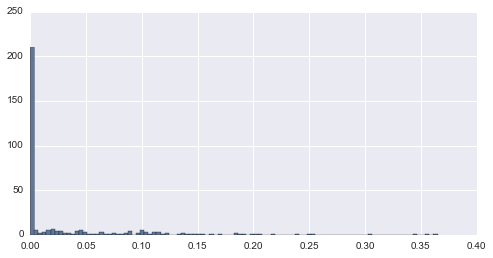

In [38]:
plt.hist(U_norm_0[320:640], bins=100)
plt.show()

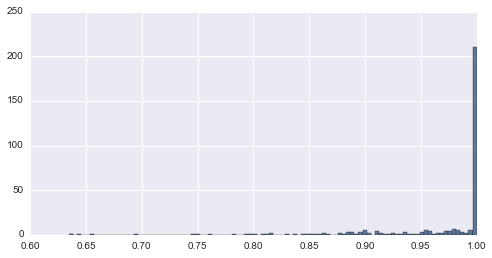

In [39]:
plt.hist(U_norm_1[320:640], bins=100)
plt.show()

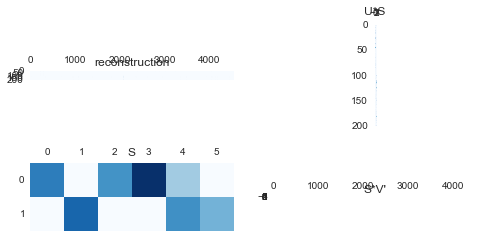

## Scores

#### Rows scores
- Rand score: 0.809046576272
- Normalized mutual information score: 0.738455346759




In [127]:
plot_factorization_result(U, S, V)
print scores(rows_ind, labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


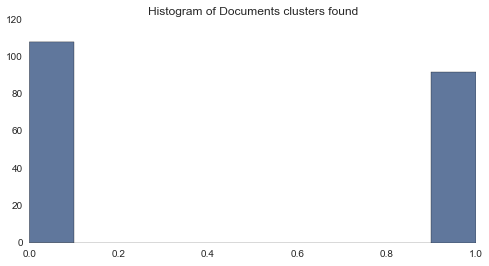

In [128]:
print rows_ind
plt.hist(rows_ind)
plt.title('Histogram of Documents clusters found')
plt.show()

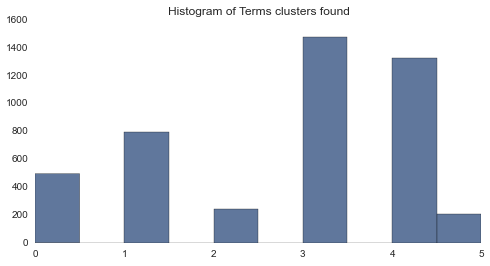

In [129]:
plt.hist(cols_ind)
plt.title('Histogram of Terms clusters found')
plt.show()

In [130]:
def print_top_terms(n, term_clust, clust, terms):
    # TODO change this (Strings are immutable)
    txt = ''
    txt += '---------------\n'
    term_clust_prob = term_clust / term_clust.sum()
    top_terms_inds = term_clust_prob[:][:, clust].argsort()[-n:][::-1]
    for term_ind in top_terms_inds:
        term_prob = term_clust_prob[term_ind, clust]
        txt += '- term: %s, prob: %f\n' % (terms[term_ind], term_prob)
    return txt

print print_top_terms(20, V, 0, count_vect.get_feature_names())
print print_top_terms(20, V, 1, count_vect.get_feature_names())

---------------
- term: gente, prob: 0.002786
- term: towerfall, prob: 0.002143
- term: jogos, prob: 0.001554
- term: vai, prob: 0.001541
- term: amora, prob: 0.001516
- term: matt, prob: 0.001215
- term: brasil, prob: 0.001194
- term: alves, prob: 0.001179
- term: ministério, prob: 0.001055
- term: jogo, prob: 0.001040
- term: aqui, prob: 0.001039
- term: governo, prob: 0.001000
- term: pra, prob: 0.000910
- term: pessoas, prob: 0.000904
- term: pessoal, prob: 0.000901
- term: tipo, prob: 0.000867
- term: conta, prob: 0.000719
- term: ano, prob: 0.000717
- term: dias, prob: 0.000701
- term: evento, prob: 0.000654

---------------
- term: minutos, prob: 0.004517
- term: gol, prob: 0.004240
- term: bola, prob: 0.002351
- term: partida, prob: 0.002265
- term: pontos, prob: 0.001728
- term: barcelona, prob: 0.001704
- term: itália, prob: 0.001694
- term: técnico, prob: 0.001661
- term: espanha, prob: 0.001609
- term: campo, prob: 0.001579
- term: atacante, prob: 0.001406
- term: chance, p

In [131]:
def get_top_terms(n, doc_clust, S):
    term_clust_prob = S[doc_clust, :] / S[doc_clust, :].sum()
    top_terms_clust_inds = S[doc_clust, :].argsort()[-n:][::-1]
    top_tems_clust_prob = term_clust_prob[top_terms_clust_inds]
    return top_terms_clust_inds, top_tems_clust_prob

print '## Games articles cluster:\n'
top_terms_clust_inds, top_tems_clust_prob = get_top_terms(3, 0, S)
for t, p in zip(top_terms_clust_inds, top_tems_clust_prob):
    print '#### Term cluster %d with probability %f' % (t, p)
    print print_top_terms(15, V, t, count_vect.get_feature_names())

## Games articles cluster:

#### Term cluster 3 with probability 0.372773
---------------
- term: jogos, prob: 0.007618
- term: games, prob: 0.005769
- term: jogo, prob: 0.003175
- term: game, prob: 0.002818
- term: cultura, prob: 0.002620
- term: pessoas, prob: 0.001966
- term: of, prob: 0.001807
- term: brasil, prob: 0.001659
- term: the, prob: 0.001628
- term: indústria, prob: 0.001294
- term: assim, prob: 0.001267
- term: design, prob: 0.001224
- term: wii, prob: 0.001208
- term: além, prob: 0.001170
- term: mundo, prob: 0.001165

#### Term cluster 0 with probability 0.261504
---------------
- term: gente, prob: 0.002786
- term: towerfall, prob: 0.002143
- term: jogos, prob: 0.001554
- term: vai, prob: 0.001541
- term: amora, prob: 0.001516
- term: matt, prob: 0.001215
- term: brasil, prob: 0.001194
- term: alves, prob: 0.001179
- term: ministério, prob: 0.001055
- term: jogo, prob: 0.001040
- term: aqui, prob: 0.001039
- term: governo, prob: 0.001000
- term: pra, prob: 0.000910
- 

In [138]:
def accuracy(labels_true, labels_pred):
    rights = labels_true == labels_pred
    return np.sum(rights) / float(len(rights))

def get_mistakes(labels_true, labels_pred):
    not_labels_pred = np.logical_not(labels_pred)
    acc = accuracy(labels_true, labels_pred)
    acc_swaped = accuracy(labels_true, not_labels_pred)

    if acc_swaped > acc:
        best_pred = not_labels_pred
    else:
        best_pred = labels_pred

    rights = labels_true == best_pred
    return np.where(rights == False)[0], best_pred

In [135]:
# opts = {
#     'k': [2, 4],
#     'l': [2, 4, 6, 8],
#     'X': ['X_bin',
#           'X_stem_bin',
#           'X_train',
#           'X_train_stem',
#           'X_train_norm',
#           'X_train_norm_stem',
#           'X_train_tfidf',
#           'X_train_tfidf_stem',
#           'X_train_norm_tfidf',
#           'X_train_norm_tfidf_stem']
# }
opts = {
    'k': [2],
    'l': [2],
    'X': ['X_bin']
}

In [141]:
def run(opts):
    statistics = []

    for k in opts['k']:
        for l in opts['l']:
            for data_type in opts['X']:
                params_str = 'results/nmfOnIG/k%d_l%d_%s' % (k, l, data_type)
                
                print 'Writing %s* stuff...' % params_str

                md_file = codecs.open(params_str + '.md', 'w', 'utf-8')
                md_file.write('Run Params: k%d l%d %s\n' % (k, l, data_type))
                md_file.write('======================\n\n')

                exec('Data = %s' % data_type)
                
                best_score = -1.0
                for _ in xrange(1):
                    U_temp, S_temp, V_temp, rows_ind_temp, cols_ind_temp = matrix_factorization_clustering(Data.toarray(), k, l, onmtf, num_iters=50)
                    score = adjusted_rand_score(labels, rows_ind_temp)
                    if score > best_score:
                        U = U_temp
                        S = S_temp
                        V = V_temp
                        rows_ind = rows_ind_temp
                        cols_ind = cols_ind_temp
                        best_score = score

                statistics.append((params_str, best_score))
                
                pickle.dump(U, open(params_str + '_U.pkl', 'w'))
                pickle.dump(S, open(params_str + '_S.pkl', 'w'))
                pickle.dump(V, open(params_str + '_V.pkl', 'w'))
                pickle.dump(rows_ind, open(params_str + '_docs_clusters.pkl', 'w'))
                pickle.dump(cols_ind, open(params_str + '_terms_clusters.pkl', 'w'))
                pickle.dump(Data.toarray(), open(params_str + '_terms_clusters.pkl', 'w'))
                
                md_file.write(scores(labels, rows_ind))

                mistakes_inds, best_preds = get_mistakes(labels, rows_ind)
                print best_preds

                for kth in xrange(k):
                    md_file.write('## %d articles cluster:\n\n' % kth)
                    top_terms_clust_inds, top_tems_clust_prob = get_top_terms(min(l,3), kth, S)
                    for t, p in zip(top_terms_clust_inds, top_tems_clust_prob):
                        md_file.write('#### Term cluster %d with probability %f\n' % (t, p))
                        if 'stem' in data_type:
                            md_file.write(print_top_terms(30, V, t, count_vect_stem.get_feature_names()))
                        else:
                            md_file.write(print_top_terms(30, V, t, count_vect.get_feature_names()))
                        md_file.write('\n')
                    
                    md_file.write('#### Mistakes\n')
                    for mistake_ind in mistakes_inds:
                        if best_preds[mistake_ind] == 1:
                            md_file.write('- %s\n' % sport_news_df['url'].loc[mistake_ind - len(arena_news_df)])
                        else:
                            md_file.write('- %s\n' % arena_news_df['url'].loc[mistake_ind])
                        
                    md_file.write('\n')
                
                md_file.close()
                print 'Finish!'

    statistics.sort(key=lambda tup: tup[1])

    statistics_file = codecs.open('results/nmfOnIG/statistics.md', 'w')
    statistics_file.write('# Best configurations (rand score)\n\n')

    for k, v in statistics:
        statistics_file.write('- configuration: %s, score: %.2f\n\n' % (k, v))

run(opts)

Writing results/nmfOnIG/k2_l2_X_bin* stuff...
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1]
Finish!


In [152]:
def load(k, l, data_type):
    params_str = 'results/nmfOnIG/k%d_l%d_%s' % (k, l, data_type)
    U = pickle.loads(params_str + '_U.pkl')
    S = pickle.loads(params_str + '_S.pkl')
    V = pickle.loads(params_str + '_V.pkl')
    rows_ind = pickle.loads(params_str + '_docs_clusters.pkl')
    cols_ind = pickle.loads(params_str + '_terms_clusters.pkl')
    data = pickle.loads(params_str + '_terms_clusters.pkl')
    return U, S, V, rows_ind, cols_ind, data

In [149]:
def run_nmf_compute_score(k, l, data_type):
    U, S, V, rows_ind, cols_ind, data = load(k, l, data_type)
    mistakes_inds, best_preds = get_mistakes(labels, rows_ind)

    new_labels_true = np.array((100 - len(mistakes_inds[mistakes_inds < 100]))*[0] +
                              (100 - len(mistakes_inds[mistakes_inds >= 100]))*[1])

    np.delete(data, mistakes_inds)
    U, S, V, rows_ind, cols_ind = matrix_factorization_clustering(data, k, l, onmtf, num_iters=50)
    print scores(new_labels_true, rows_ind)

run_nmf_compute_score(2, 8, 'X_train_norm_tfidf')

UnpicklingError: unpickling stack underflow

| Tables        | Are           | Cool  |
|:-------------:|:-------------:|:-----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |